In [1]:
import numpy as np
data = np.genfromtxt('archive/mnist_train.csv', delimiter=',')

In [70]:
testdata = np.genfromtxt('archive/mnist_test.csv', delimiter = ',')

In [2]:
data = data[1 : ]

In [3]:
Y_train = data[: , 0]
X_train = data[: , 1: ]

In [4]:
X_train.shape, Y_train.shape

((60000, 784), (60000,))

In [5]:
## one hot encoding
Y_train_encoded = np.zeros((60000, 10))

In [6]:
for data in range(len(Y_train_encoded)):
    Y_train_encoded[data][int(Y_train[data])] = 1

In [7]:
Y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [72]:
testdata = testdata[1 : ]

In [75]:
Y_test = testdata[: , 0]
X_test = testdata[: , 1: ]


In [78]:
Y_test_encoded = np.zeros((10000, 10))

In [79]:
for data in range(len(Y_test_encoded)):
    Y_test_encoded[data][int(Y_test[data])] = 1

In [8]:
import matplotlib.pyplot as plt

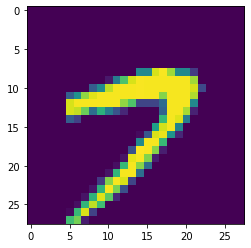

In [9]:
plt.imshow(X_train[91].reshape((28, 28)))
plt.show()

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [61]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [62]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [63]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])

pred = forward_propagation(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))



In [64]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [65]:
## while training the optimizer trains all varialbes. Variables have a property called as trainable = true
## the property can be explicitly set as false if req.
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_18:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_19:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_20:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_21:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_22:0' shape=(25

In [66]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [68]:
for i in range(20):    
    c, _ = sess.run([cost, optimize], feed_dict = {
        x: X_train,
        y: Y_train_encoded
    })
    print(c)

27880.84
26212.332
25401.17
24837.543
24088.596
23057.143
21859.45
20665.982
19596.686
18696.58
17959.74
17332.7
16769.875
16220.796
15676.269
15158.276
14680.395
14241.291
13828.776
13433.783


In [81]:
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)

In [82]:
predictions_eval,labels, correct_pred, cost = sess.run([predictions, true_labels, correct_predictions, cost], 
                                                  feed_dict={x:X_test, y:Y_test_encoded})
predictions_eval,labels,correct_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [85]:
correct_pred.sum()

8863